In [1]:
import pandas as pd
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.shape

(244, 7)

In [4]:
tips['total_bill'].sum()

4827.77

In [5]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

### Grouping 

In [3]:
day_group = tips.groupby('day')

In [4]:
day_group['total_bill'].sum()

day
Thur    1096.33
Fri      325.88
Sat     1778.40
Sun     1627.16
Name: total_bill, dtype: float64

In [5]:
tips.groupby('sex')['total_bill','tip'].mean()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,total_bill,tip
sex,,
Male,20.744076,3.089618
Female,18.056897,2.833448


In [6]:
g = tips.groupby(['day','sex'])

In [9]:
g['total_bill','tip'].sum()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


total_bill     tip
day  sex                       
Thur Male        561.44   89.41
     Female      534.89   82.42
Fri  Male        198.57   26.93
     Female      127.31   25.03
Sat  Male       1227.35  181.95
     Female      551.05   78.45
Sun  Male       1269.46  186.78
     Female      357.70   60.61

In [12]:
tips['tip_per'] = tips['tip'] / tips['total_bill'] * 100

In [13]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_per
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


In [14]:
tips.sort_values(by='tip_per', ascending=False).head()                 

,total_bill,tip,sex,smoker,day,time,size,tip_per
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.666667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573290
232,11.61,3.39,Male,No,Sat,Dinner,2,29.198966
183,23.17,6.50,Male,Yes,Sun,Dinner,4,28.053517


In [10]:
tips.groupby('day').agg(['mean','sum','max'])

total_bill                       tip                     size         
           mean      sum    max      mean     sum    max      mean  sum max
day                                                                        
Thur  17.682742  1096.33  43.11  2.771452  171.83   6.70  2.451613  152   6
Fri   17.151579   325.88  40.17  2.734737   51.96   4.73  2.105263   40   4
Sat   20.441379  1778.40  50.81  2.993103  260.40  10.00  2.517241  219   5
Sun   21.410000  1627.16  48.17  3.255132  247.39   6.50  2.842105  216   6

In [18]:
tips.groupby(['smoker','day'])['total_bill'].sum()

smoker  day 
Yes     Thur     326.24
        Fri      252.20
        Sat      893.62
        Sun      458.28
No      Thur     770.09
        Fri       73.68
        Sat      884.78
        Sun     1168.88
Name: total_bill, dtype: float64

In [19]:
tips.groupby('smoker')['total_bill'].sum()

smoker
Yes    1930.34
No     2897.43
Name: total_bill, dtype: float64

#### Top 3 transactions for each week day

In [11]:
day_group = tips.groupby('day')
print(type(day_group))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [15]:
# First element is group and second one is row in that group
for g,trans in day_group:
    print(type(trans))
    print(g)
    print(trans.sort_values(by='total_bill', ascending=False).head(3))

<class 'pandas.core.frame.DataFrame'>
Thur
     total_bill   tip     sex smoker   day   time  size
197       43.11  5.00  Female    Yes  Thur  Lunch     4
142       41.19  5.00    Male     No  Thur  Lunch     5
85        34.83  5.17  Female     No  Thur  Lunch     4
<class 'pandas.core.frame.DataFrame'>
Fri
    total_bill   tip   sex smoker  day    time  size
95       40.17  4.73  Male    Yes  Fri  Dinner     4
90       28.97  3.00  Male    Yes  Fri  Dinner     2
96       27.28  4.00  Male    Yes  Fri  Dinner     2
<class 'pandas.core.frame.DataFrame'>
Sat
     total_bill    tip   sex smoker  day    time  size
170       50.81  10.00  Male    Yes  Sat  Dinner     3
212       48.33   9.00  Male     No  Sat  Dinner     4
59        48.27   6.73  Male     No  Sat  Dinner     4
<class 'pandas.core.frame.DataFrame'>
Sun
     total_bill  tip   sex smoker  day    time  size
156       48.17  5.0  Male     No  Sun  Dinner     6
182       45.35  3.5  Male    Yes  Sun  Dinner     3
184       40.55 

In [15]:
tips.groupby(['day','sex']).sum()

total_bill     tip  size
day  sex                             
Thur Male        561.44   89.41    73
     Female      534.89   82.42    79
Fri  Male        198.57   26.93    21
     Female      127.31   25.03    19
Sat  Male       1227.35  181.95   156
     Female      551.05   78.45    63
Sun  Male       1269.46  186.78   163
     Female      357.70   60.61    53

In [16]:
tips.groupby(['day','sex'], as_index=False).sum()

,day,sex,total_bill,tip,size
0,Thur,Male,561.44,89.41,73
1,Thur,Female,534.89,82.42,79
2,Fri,Male,198.57,26.93,21
3,Fri,Female,127.31,25.03,19
4,Sat,Male,1227.35,181.95,156
5,Sat,Female,551.05,78.45,63
6,Sun,Male,1269.46,186.78,163
7,Sun,Female,357.70,60.61,53


In [17]:
tips.groupby('day')['total_bill'].sum()

day
Thur    1096.33
Fri      325.88
Sat     1778.40
Sun     1627.16
Name: total_bill, dtype: float64

In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


#### Pivot Table

In [4]:
tips.pivot_table(index='day',columns='smoker',values='tip', aggfunc='sum')

smoker,Yes,No
day,,
Thur,51.51,120.32
Fri,40.71,11.25
Sat,120.77,139.63
Sun,66.82,180.57


In [19]:
tips.groupby(['day','smoker'])['tip'].sum()

day   smoker
Thur  Yes        51.51
      No        120.32
Fri   Yes        40.71
      No         11.25
Sat   Yes       120.77
      No        139.63
Sun   Yes        66.82
      No        180.57
Name: tip, dtype: float64

In [6]:
tips.pivot_table(index=['day'],columns=['sex','smoker'], values='tip', aggfunc='sum', margins=True)

sex       Male         Female             All
smoker     Yes      No    Yes      No        
day                                          
Thur     30.58   58.83  20.93   61.49  171.83
Fri      21.93    5.00  18.78    6.25   51.96
Sat      77.74  104.21  43.03   35.42  260.40
Sun      52.82  133.96  14.00   46.61  247.39
All     183.07  302.00  96.74  149.77  731.58

### get_dummies()

In [4]:
pd.get_dummies( tips[['smoker','time', 'day']])

,smoker_Yes,smoker_No,time_Lunch,time_Dinner,day_Thur,day_Fri,day_Sat,day_Sun
0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,0,0,1
2,0,1,0,1,0,0,0,1
3,0,1,0,1,0,0,0,1
4,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
239,0,1,0,1,0,0,1,0
240,1,0,0,1,0,0,1,0
241,1,0,0,1,0,0,1,0
242,0,1,0,1,0,0,1,0


### Binning

In [6]:
tips['bill_bin'] = pd.cut(tips.total_bill,5)

In [7]:
tips[['total_bill','bill_bin']]

,total_bill,bill_bin
0,16.99,"(12.618, 22.166]"
1,10.34,"(3.022, 12.618]"
2,21.01,"(12.618, 22.166]"
3,23.68,"(22.166, 31.714]"
4,24.59,"(22.166, 31.714]"
...,...,...
239,29.03,"(22.166, 31.714]"
240,27.18,"(22.166, 31.714]"
241,22.67,"(22.166, 31.714]"
242,17.82,"(12.618, 22.166]"


In [9]:
tips['bill_bin'] = pd.cut(tips.total_bill,bins=[0,10,30,50,100])
tips[['total_bill','bill_bin']]

,total_bill,bill_bin
0,16.99,"(10, 30]"
1,10.34,"(10, 30]"
2,21.01,"(10, 30]"
3,23.68,"(10, 30]"
4,24.59,"(10, 30]"
...,...,...
239,29.03,"(10, 30]"
240,27.18,"(10, 30]"
241,22.67,"(10, 30]"
242,17.82,"(10, 30]"


In [10]:
tips['bill_bin'].value_counts()

(10, 30]     195
(30, 50]      31
(0, 10]       17
(50, 100]      1
Name: bill_bin, dtype: int64

In [12]:
tips['bill_bin'] = pd.cut(tips.total_bill,bins=[0,10,20,40,100],labels=['Low','Medium','High','Very High'])
tips[['total_bill','bill_bin']]

,total_bill,bill_bin
0,16.99,Medium
1,10.34,Medium
2,21.01,High
3,23.68,High
4,24.59,High
...,...,...
239,29.03,High
240,27.18,High
241,22.67,High
242,17.82,Medium


In [13]:
tips['bill_bin'].value_counts()

Medium       130
High          87
Low           17
Very High     10
Name: bill_bin, dtype: int64

In [15]:
pd.qcut(tips['total_bill'], [0,.25,.75,1], labels=['LQ','IQR','UQ'])

0      IQR
1       LQ
2      IQR
3      IQR
4       UQ
      ... 
239     UQ
240     UQ
241    IQR
242    IQR
243    IQR
Name: total_bill, Length: 244, dtype: category
Categories (3, object): [LQ < IQR < UQ]

### Pivot Table

In [4]:
tips.pivot_table(index='day', columns='smoker', aggfunc='sum')

size          tip         total_bill         
smoker  Yes   No     Yes      No        Yes       No
day                                                 
Thur     40  112   51.51  120.32     326.24   770.09
Fri      31    9   40.71   11.25     252.20    73.68
Sat     104  115  120.77  139.63     893.62   884.78
Sun      49  167   66.82  180.57     458.28  1168.88

In [6]:
tips.pivot_table(index='day', columns='smoker', values='tip')

smoker,Yes,No
day,,
Thur,3.030000,2.673778
Fri,2.714000,2.812500
Sat,2.875476,3.102889
Sun,3.516842,3.167895


In [7]:
tips.pivot_table(index='day', columns='sex', aggfunc=sum, values=['total_bill'])

total_bill        
sex        Male  Female
day                    
Thur     561.44  534.89
Fri      198.57  127.31
Sat     1227.35  551.05
Sun     1269.46  357.70

In [8]:
tips.pivot_table(index='day', columns='smoker', 
                 aggfunc={'size': 'mean', 'total_bill' : [sum , max] }, 
                 values=['total_bill','size'])

size           total_bill                        
            mean                  max            sum         
smoker       Yes        No        Yes     No     Yes       No
day                                                          
Thur    2.352941  2.488889      43.11  41.19  326.24   770.09
Fri     2.066667  2.250000      40.17  22.75  252.20    73.68
Sat     2.476190  2.555556      50.81  48.33  893.62   884.78
Sun     2.578947  2.929825      45.35  48.17  458.28  1168.88

In [9]:
tips['tip_per'] = tips.tip / tips.total_bill * 100 

In [10]:
tips.pivot_table(index='day', columns='sex', values=['tip_per'])

tip_per           
sex        Male     Female
day                       
Thur  16.527649  15.752483
Fri   14.338519  19.938840
Sat   15.157684  15.647021
Sun   16.234407  18.156877

In [11]:
tips.pivot_table(index='day', columns='time', values=['tip_per'])

tip_per           
time      Lunch     Dinner
day                       
Thur  16.130074  15.974441
Fri   18.876489  15.891611
Sat         NaN  15.315172
Sun         NaN  16.689729

### Plotting 

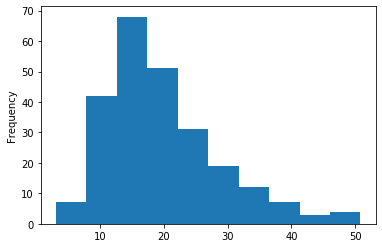

In [18]:
tips.total_bill.plot.hist()

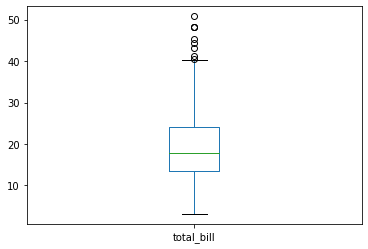

In [19]:
tips.total_bill.plot.box()

day
Thur    1096.33
Fri      325.88
Sat     1778.40
Sun     1627.16
Name: total_bill, dtype: float64


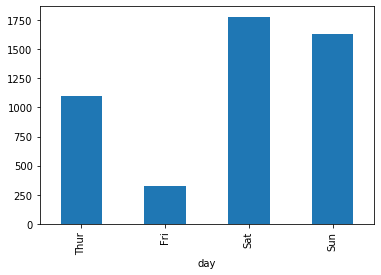

In [14]:
day_total = tips.groupby("day")['total_bill'].sum()
print(day_total)
day_total.plot.bar()

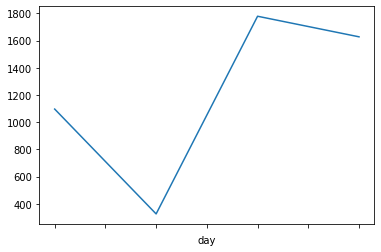

In [15]:
day_total.plot.line()

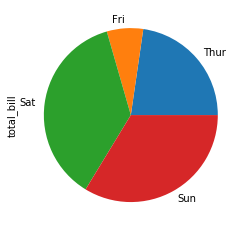

In [6]:
day_total = tips.groupby("day")['total_bill'].sum()
day_total.plot.pie()

In [7]:
totals = tips.groupby(["day",'sex'])['total_bill'].sum()
totals

day   sex   
Thur  Male       561.44
      Female     534.89
Fri   Male       198.57
      Female     127.31
Sat   Male      1227.35
      Female     551.05
Sun   Male      1269.46
      Female     357.70
Name: total_bill, dtype: float64

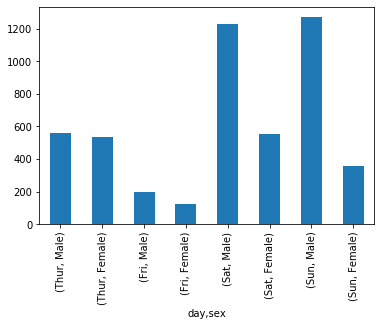

In [8]:
totals.plot.bar()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


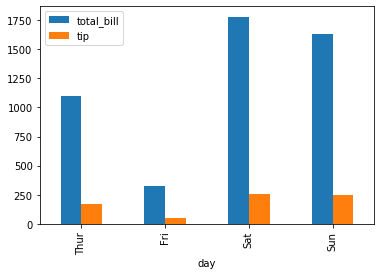

In [12]:
tips.groupby('day')['total_bill','tip'].sum().plot(kind='bar')

In [9]:
day_total = tips.pivot_table(index='day',columns='sex',values=['total_bill'],aggfunc='sum')

In [10]:
day_total

total_bill        
sex        Male  Female
day                    
Thur     561.44  534.89
Fri      198.57  127.31
Sat     1227.35  551.05
Sun     1269.46  357.70

In [12]:
day_total.columns = ['Male','Female']
day_total

,Male,Female
day,,
Thur,561.44,534.89
Fri,198.57,127.31
Sat,1227.35,551.05
Sun,1269.46,357.70


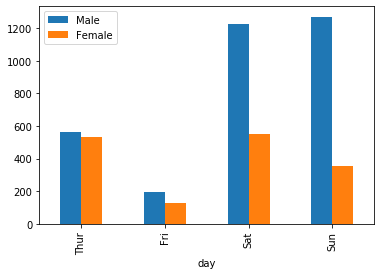

In [13]:
day_total.plot.bar()

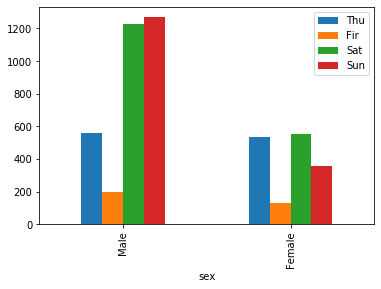

In [19]:
gender_total = tips.pivot_table(index='sex',columns='day',values=['total_bill'],aggfunc='sum')
gender_total.columns = ["Thu",'Fir','Sat','Sun']
gender_total.plot.bar()

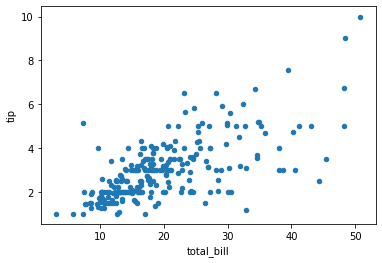

In [20]:
tips.plot.scatter('total_bill','tip')

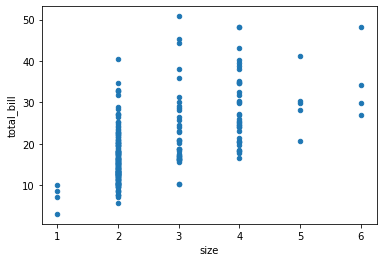

In [21]:
tips.plot.scatter('size','total_bill')

In [22]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [23]:
smoker_total = tips.groupby('smoker')['tip'].mean()

In [24]:
smoker_total

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

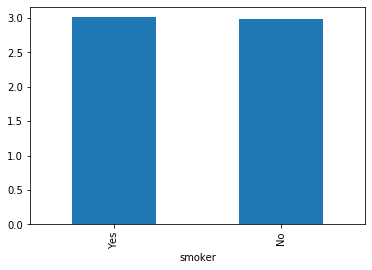

In [25]:
smoker_total.plot.bar()